# Qiskit basics and Sinble Qubit Quantum Gates

In [1]:
import qiskit

In [2]:
import numpy as np

In [3]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister 

In [4]:
from qiskit_aer import Aer

In [5]:
#from qiskit import BasicAer

In [6]:
""" previous version path:

from qiskit import execute 
job = execute(circuit, backend)
 
New path:
from qiskit import transpile
 
new_circuit = transpile(circuit, backend)
job = backend.run(new_circuit)"""

' previous version path:\n\nfrom qiskit import execute \njob = execute(circuit, backend)\n \nNew path:\nfrom qiskit import transpile\n \nnew_circuit = transpile(circuit, backend)\njob = backend.run(new_circuit)'

In [7]:
from qiskit import transpile

In [8]:
from qiskit.visualization import plot_bloch_multivector

In [9]:
from qiskit.visualization import plot_histogram

In [10]:
from math import pi, sqrt

In [11]:
#print the qiskit version (this was in IBM exam)

In [12]:
print("Qiskit version:", qiskit.__version__)

Qiskit version: 1.1.0


In [13]:
qiskit.__version__

'1.1.0'

In [14]:
# Aer is written in C++ and BasicAer is written in Python

In [15]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [16]:
#from qiskit import BasicAer  -->this is the old version
#backend = BasicAer.get_backend('qasm_simulator')

In [17]:
cr = ClassicalRegister(1,"cr")
qr = QuantumRegister(1, "qr")
qc = QuantumCircuit(qr, cr)
qc.draw()

qr: 
      
cr: 1/

In [18]:
from qiskit.visualization import circuit_drawer

In [19]:
import pylatexenc

In [20]:
from pylatexenc.latex2text import LatexNodes2Text

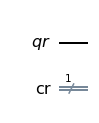

In [21]:
qc.draw('mpl')

### Basic Qiskit Information
### All qubits in Qiskit starts from the state |0> by default
### Qiskit uses little endian ordering system for both classical bit and quantum bit ordering. This means that for 3 qubits q0, q1, and q2, the qiskit ordering is reversed as q2, q1, and q0. Same is for classical bits as well. 

# All steps to show a Quantum Gate
1. Define the gate
2. show the Bloch Sphere
3. show the unitary matrix
4. measure the qubit
5. QASM simulator

## Pauli X Gate

In [54]:
qr_x = QuantumRegister(1, "qr") # this line creates a quantum register with 1 qubit
qc_x = QuantumCircuit(qr_x) # this line creates a quantum circuit using the quantum register
qc_x.x(qr_x[0]) # .x() applies the X gate and qr_x[0] selects the first qubit 
# if we got two qubit like: QuantumRegister(2, "qr") then we would decide which
# can be chosen here

qc_x.draw()

# qc_x.save_statevector(): quantum state that we get after quantum gate
# qc_x.save_unitary() 

┌───┐
qr: ┤ X ├
    └───┘

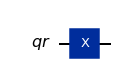

In [55]:
qc_x.draw('mpl')


 Quantum State is:  Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


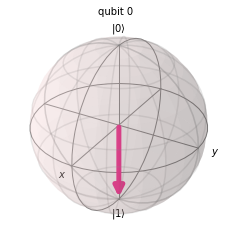

In [56]:
# what is the quantum state after apply X-gate

backend = Aer.get_backend('statevector_simulator') 
x_gate = transpile(qc_x, backend)
job = backend.run(x_gate)
result = job.result().get_statevector(qc_x, decimals =3)

print("\n Quantum State is: ", result)

plot_bloch_multivector(result)

In [57]:
# calculate the quantum state after applying identity gate


 Quantum State is:  Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


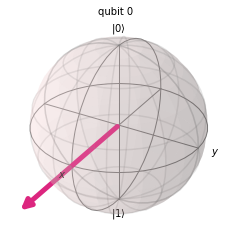

In [58]:
backend = Aer.get_backend('unitary_simulator')

x_unitary = transpile(qc_x, backend)

job= backend.run(x_unitary)

result = job.result().get_unitary(qc_x, decimals =3)

print("\n Quantum State is: ", result)

plot_bloch_multivector(result)

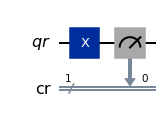

In [59]:
# lets do the measurement to get the probability

cr_x = ClassicalRegister(1, "cr")
qr_x = QuantumRegister(1, "qr")
qc_x = QuantumCircuit(qr_x,cr_x)
qc_x.x(qr_x[0])
qc_x.measure(0,0) # first qubit gets to the first classical bit
qc_x.draw('mpl')

In [60]:
backend = Aer.get_backend('qasm_simulator')

histo_job = transpile(qc_x, backend)

job = backend.run(histo_job, shots = 1000) # the circuit will be executed 1000 time 
# this is because of having noise in the system

result = job.result()

counts = result.get_counts(qc_x) # extracts the measurement counts corresponding to different measurement outcomes of the quantum circuit qc_x

print("\nTotal counts are: ", counts)


Total counts are:  {'1': 1000}


In [61]:
# counts is a dictionary function and 
# '1': This key indicates that all 1000 measurements resulted 
# in the qubit being measured in the state |1⟩
# the probability of occuring state 1 is 100%

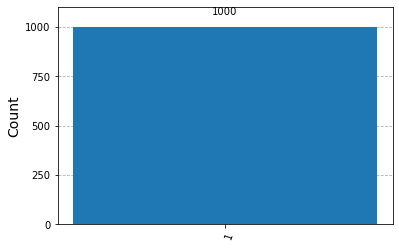

In [62]:
plot_histogram(counts)

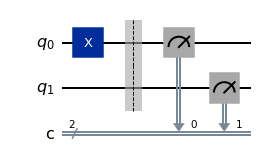

In [63]:
# lets work with 2 qubits(first 2) and 2 classical bits (second 2) but we don't define quantum register or classical register
qc_x = QuantumCircuit(2,2, name="qc")
qc_x.x(0)
qc_x.barrier()
qc_x.measure(0,0) # This line specifies that the qubit at index 0 should be measured, and the measurement result should be 
#stored in the classical bit at index 0.
qc_x.measure(1,1)
# or combine both classical and quantum measurement here:
# qc_x.measure([0,1], [0,1])

qc_x.draw('mpl')

In [64]:
# x is a quantum gate, there is a barrier and then two measurement
# This adds a visual barrier in the circuit diagram to separate different parts
# of the circuit. It doesn't affect the quantum computation but is useful for 
# organizing and understanding the circuit layout visually.

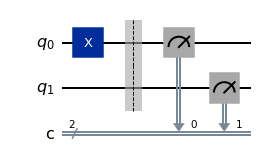

In [65]:
qc_x = QuantumCircuit(2,2, name="qc")
qc_x.x(0)
qc_x.barrier()
# or combine both classical and quantum measurement here:
qc_x.measure([0,1], [0,1]) 
# qc_x.measure([0, 1], [0, 1]): This single line specifies a multi-qubit measurement
qc_x.draw('mpl')

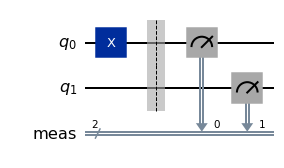

In [66]:
# another way
qc= QuantumCircuit(2, name ="qc")
qc.x(0)
qc.measure_all() # this will work same as previous code
qc.draw('mpl')

# Pauli Y Gate

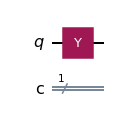

In [67]:
qc_y = QuantumCircuit(1,1,name = "qc")
qc_y.y(0)
qc_y.draw('mpl')


 Quantum state is:  Statevector([0.-0.j, 0.+1.j],
            dims=(2,))


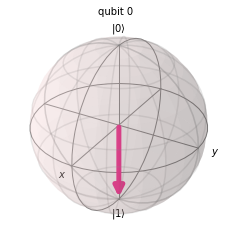

In [68]:
backend = Aer.get_backend('statevector_simulator')

y_gate = transpile (qc_y, backend)

job = backend.run(y_gate)

result = job.result().get_statevector(qc_y, decimals = 3)

print("\n Quantum state is: ", result)

plot_bloch_multivector(result)



Print unitary matrix:  Operator([[0.-0.j, 0.-1.j],
          [0.+1.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


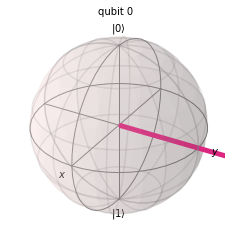

In [70]:
backend = Aer.get_backend('unitary_simulator')

y_unitary = transpile (qc_y, backend)

job = backend.run(y_unitary)

result = job.result().get_unitary(qc_y, decimals = 3)

print("\nPrint unitary matrix: " , result)

plot_bloch_multivector(result)


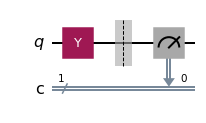

In [71]:
# measure the qubit
qc_y = QuantumCircuit(1,1, name = "qc")
qc_y.y(0)
qc_y.barrier()
qc_y.measure(0,0)
qc_y.draw('mpl')

In [72]:
# QASM simulator code
backend = Aer.get_backend('qasm_simulator')

histo_job = transpile(qc_y, backend)

job = backend.run(histo_job, shots = 1000) # if we don't define number of shots
# by default it will run upto 1024

result = job.result()

counts = result.get_counts(qc_y)

print("\nTotal counts are: ", counts)


Total counts are:  {'1': 1000}


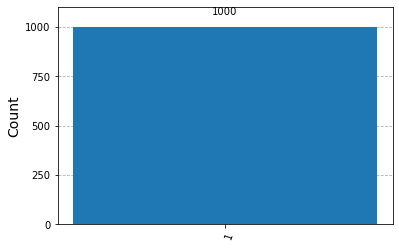

In [73]:
plot_histogram(counts)

# Pauli Z Gate

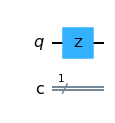

In [74]:
qc_z = QuantumCircuit(1,1,name = "qc")
qc_z.z(0)
qc_z.draw('mpl')


 Quantum state is:  Statevector([ 1.+0.j, -0.+0.j],
            dims=(2,))


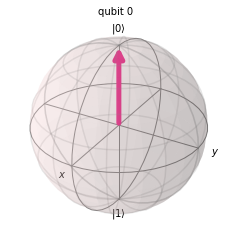

In [75]:
backend = Aer.get_backend('statevector_simulator')

z_gate = transpile (qc_z, backend)

job = backend.run(z_gate)

result = job.result().get_statevector(qc_z, decimals = 3)

print("\n Quantum state is: ", result)

plot_bloch_multivector(result)


Print unitary matrix:  Operator([[ 1.+0.j,  0.+0.j],
          [-0.+0.j, -1.+0.j]],
         input_dims=(2,), output_dims=(2,))


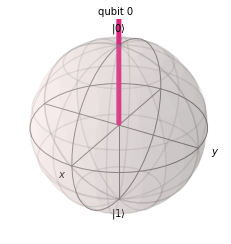

In [76]:
backend = Aer.get_backend('unitary_simulator')

z_unitary = transpile (qc_z, backend)

job = backend.run(z_unitary)

result = job.result().get_unitary(qc_z, decimals = 3)

print("\nPrint unitary matrix: " , result)

plot_bloch_multivector(result)

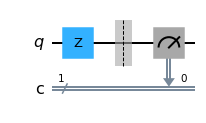

In [77]:
# measure the qubit
qc_z = QuantumCircuit(1,1, name = "qc")
qc_z.z(0)
qc_z.barrier()
qc_z.measure(0,0)
qc_z.draw('mpl')


Total counts are:  {'1': 1000}


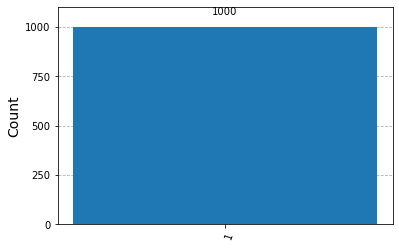

In [78]:
# QASM simulator code
backend = Aer.get_backend('qasm_simulator')

histo_job = transpile(qc_y, backend)

job = backend.run(histo_job, shots = 1000) # if we don't define number of shots
# by default it will run upto 1024

result = job.result()

counts = result.get_counts(qc_y)

print("\nTotal counts are: ", counts)
plot_histogram(counts)

## if you want to apply anything on state |1> first apply X gate then apply other gates
## this is due to the face that in Qiskit by default the initial state is set to |0>

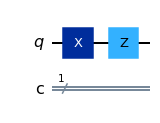

In [81]:
qc_z = QuantumCircuit(1,1,name = "qc")
qc_z.x(0)
qc_z.z(0)
qc_z.draw('mpl')


 Quantum state is:  Statevector([ 0.+0.j, -1.-0.j],
            dims=(2,))


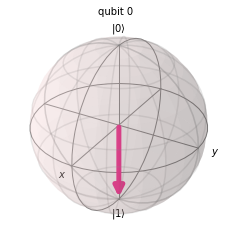

In [82]:
backend = Aer.get_backend('statevector_simulator')

z_gate = transpile (qc_z, backend)

job = backend.run(z_gate)

result = job.result().get_statevector(qc_z, decimals = 3)

print("\n Quantum state is: ", result)

plot_bloch_multivector(result)


Print unitary matrix:  Operator([[ 0.+0.j,  1.+0.j],
          [-1.-0.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))


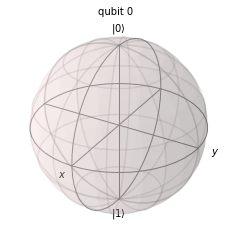

In [83]:
backend = Aer.get_backend('unitary_simulator')

z_unitary = transpile (qc_z, backend)

job = backend.run(z_unitary)

result = job.result().get_unitary(qc_z, decimals = 3)

print("\nPrint unitary matrix: " , result)

plot_bloch_multivector(result)

# S Gate

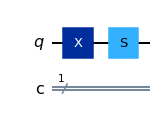

In [109]:
qc_s = QuantumCircuit(1,1, name = "qc")
# since S, S-dagger, T and T-dagger doesn't apply on |0> we change the state to |1>
qc_s.x(0) 
qc_s.s(0)
qc_s.draw('mpl')



Qunatun state is:  Statevector([-0.-0.j,  0.+1.j],
            dims=(2,))


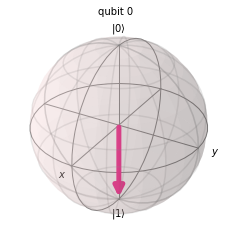

In [110]:
backend = Aer.get_backend('statevector_simulator')

s_gate = transpile (qc_s, backend)

job = backend.run(s_gate)

result= job.result().get_statevector(qc_s, decimals = 3)

print("\nQunatun state is: ", result)

plot_bloch_multivector(result)


Print unitary matrix:  Operator([[-0.-0.j,  1.-0.j],
          [ 0.+1.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))


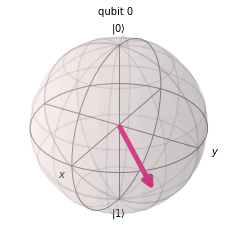

In [111]:
backend = Aer.get_backend('unitary_simulator')

s_unitary= transpile (qc_s, backend)

job = backend.run(s_unitary)

result = job.result().get_unitary(qc_s, decimals= 3)

print("\nPrint unitary matrix: " , result)

plot_bloch_multivector(result)


# S Dagger Gate

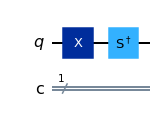

In [115]:
qc_sdg = QuantumCircuit(1,1, name = "qc")
# since S, S-dagger, T and T-dagger doesn't apply on |0> we change the state to |1>
qc_sdg.x(0) 
qc_sdg.sdg(0)
qc_sdg.draw('mpl')


Qunatun state is:  Statevector([0.+0.j, 0.-1.j],
            dims=(2,))


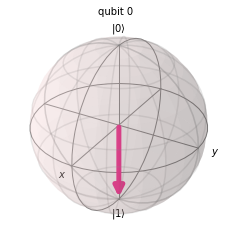

In [116]:
backend = Aer.get_backend('statevector_simulator')

sdg_gate = transpile (qc_sdg, backend)

job = backend.run(sdg_gate)

result= job.result().get_statevector(qc_sdg, decimals = 3)

print("\nQunatun state is: ", result)

plot_bloch_multivector(result)


Print unitary matrix:  Operator([[0.+0.j, 1.-0.j],
          [0.-1.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


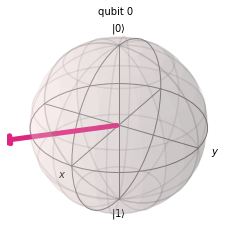

In [117]:
backend = Aer.get_backend('unitary_simulator')

sdg_unitary= transpile (qc_sdg, backend)

job = backend.run(sdg_unitary)

result = job.result().get_unitary(qc_sdg, decimals= 3)

print("\nPrint unitary matrix: " , result)

plot_bloch_multivector(result)


# T Gate

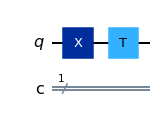

In [90]:
qc_t = QuantumCircuit(1,1, name = "qc")
# since S, S-dagger, T and T-dagger doesn't apply on |0> we change the state to |1>
qc_t.x(0) 
qc_t.t(0)
qc_t.draw('mpl')


Qunatun state is:  Statevector([-0.   -0.j   ,  0.707+0.707j],
            dims=(2,))


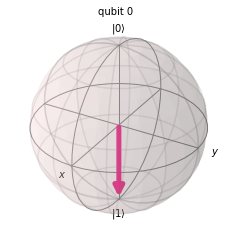

In [91]:
backend = Aer.get_backend('statevector_simulator')

t_gate = transpile (qc_t, backend)

job = backend.run(t_gate)

result= job.result().get_statevector(qc_t, decimals = 3)

print("\nQunatun state is: ", result)

plot_bloch_multivector(result)


Print unitary matrix:  Operator([[-0.   -0.j   ,  1.   -0.j   ],
          [ 0.707+0.707j,  0.   +0.j   ]],
         input_dims=(2,), output_dims=(2,))


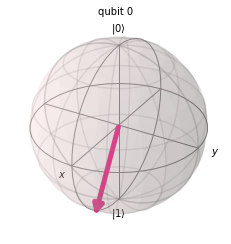

In [92]:
backend = Aer.get_backend('unitary_simulator')

t_unitary= transpile (qc_t, backend)

job = backend.run(t_unitary)

result = job.result().get_unitary(qc_t, decimals= 3)

print("\nPrint unitary matrix: " , result)

plot_bloch_multivector(result)

# T Dagger Gate

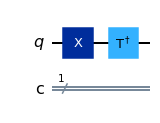

In [93]:
qc_tdg = QuantumCircuit(1,1, name = "qc")
# since S, S-dagger, T and T-dagger doesn't apply on |0> we change the state to |1>
qc_tdg.x(0) 
qc_tdg.tdg(0)
qc_tdg.draw('mpl')


Qunatun state is:  Statevector([-0.   +0.j   ,  0.707-0.707j],
            dims=(2,))


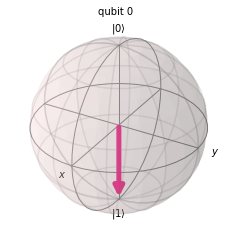

In [94]:
backend = Aer.get_backend('statevector_simulator')

tdg_gate = transpile (qc_tdg, backend)

job = backend.run(tdg_gate)

result= job.result().get_statevector(qc_tdg, decimals = 3)

print("\nQunatun state is: ", result)

plot_bloch_multivector(result)


Print unitary matrix:  Operator([[-0.   +0.j   ,  1.   -0.j   ],
          [ 0.707-0.707j,  0.   +0.j   ]],
         input_dims=(2,), output_dims=(2,))


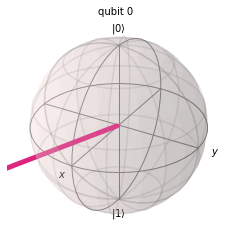

In [95]:
backend = Aer.get_backend('unitary_simulator')

tdg_unitary= transpile (qc_tdg, backend)

job = backend.run(tdg_unitary)

result = job.result().get_unitary(qc_tdg, decimals= 3)

print("\nPrint unitary matrix: " , result)

plot_bloch_multivector(result)

# RX Gate

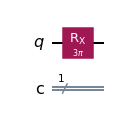

In [96]:
theta_x = 3*pi
# change theta to pi, pi/2, pi/8 and see how sphere changes
# it will be asked in the IBM exam
qc_rx = QuantumCircuit(1,1, name = "qc")
qc_rx.rx(theta_x, 0)
qc_rx.draw('mpl')


Qunatun state is:  Statevector([-0.+0.j,  0.+1.j],
            dims=(2,))


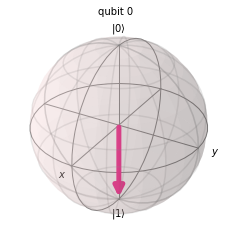

In [97]:
backend = Aer.get_backend('statevector_simulator')

rx_gate = transpile (qc_rx, backend)

job = backend.run(rx_gate)

result= job.result().get_statevector(qc_rx, decimals = 3)

print("\nQunatun state is: ", result)

plot_bloch_multivector(result)


Print unitary matrix:  Operator([[-0.+0.j,  0.+1.j],
          [ 0.+1.j, -0.+0.j]],
         input_dims=(2,), output_dims=(2,))


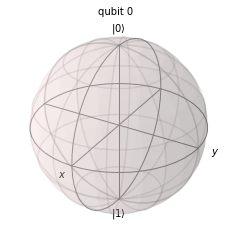

In [98]:
backend = Aer.get_backend('unitary_simulator')

rx_unitary= transpile (qc_rx, backend)

job = backend.run(rx_unitary)

result = job.result().get_unitary(qc_rx, decimals= 3)

print("\nPrint unitary matrix: " , result)

plot_bloch_multivector(result)

# RY Gate

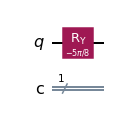

In [99]:
theta_y = -5*pi/8
# change theta to pi, pi/2, pi/8 and see how sphere changes
# it will be asked in the IBM exam
qc_ry = QuantumCircuit(1,1, name = "qc")
qc_ry.ry(theta_y, 0)
qc_ry.draw('mpl')


Qunatun state is:  Statevector([ 0.556+0.j, -0.831+0.j],
            dims=(2,))


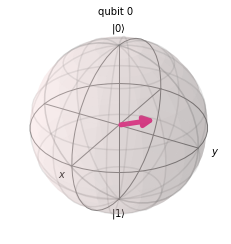

In [100]:
backend = Aer.get_backend('statevector_simulator')

ry_gate = transpile (qc_ry, backend)

job = backend.run(ry_gate)

result= job.result().get_statevector(qc_ry, decimals = 3)

print("\nQunatun state is: ", result)

plot_bloch_multivector(result)


Print unitary matrix:  Operator([[ 0.556+0.j,  0.831+0.j],
          [-0.831+0.j,  0.556+0.j]],
         input_dims=(2,), output_dims=(2,))


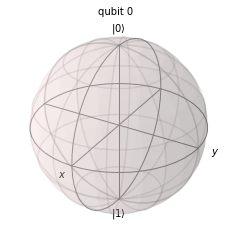

In [101]:
backend = Aer.get_backend('unitary_simulator')

ry_unitary= transpile (qc_ry, backend)

job = backend.run(ry_unitary)

result = job.result().get_unitary(qc_ry, decimals= 3)

print("\nPrint unitary matrix: " , result)

plot_bloch_multivector(result)

# RZ Gate

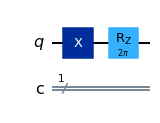

In [102]:
theta_z = 2*pi
# change theta to pi, pi/2, pi/8 and see how sphere changes
# it will be asked in the IBM exam
qc_rz = QuantumCircuit(1,1, name = "qc")
qc_rz.x(0) # since it won't change state |0>
qc_rz.rz(theta_z, 0)
qc_rz.draw('mpl')


Qunatun state is:  Statevector([-0.+0.j, -1.+0.j],
            dims=(2,))


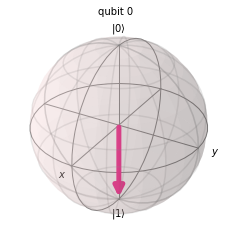

In [103]:
backend = Aer.get_backend('statevector_simulator')

rz_gate = transpile (qc_rz, backend)

job = backend.run(rz_gate)

result= job.result().get_statevector(qc_rz, decimals = 3)

print("\nQunatun state is: ", result)

plot_bloch_multivector(result)


Print unitary matrix:  Operator([[-0.+0.j, -1.+0.j],
          [-1.+0.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))


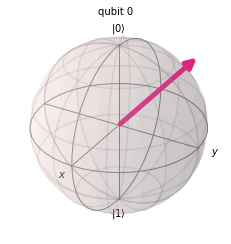

In [104]:
backend = Aer.get_backend('unitary_simulator')

rz_unitary= transpile (qc_rz, backend)

job = backend.run(rz_unitary)

result = job.result().get_unitary(qc_rz, decimals= 3)

print("\nPrint unitary matrix: " , result)

plot_bloch_multivector(result)

Exercise: try different angels for the quantum gates